# Example code to use preprocess.py

In [12]:
import sys
sys.path.append("../..")

from lunar_crater_age_logic.preprocess import load_data
from pathlib import Path
import matplotlib.pyplot as plt

In [8]:
#Test with the data
DATA_DIR = Path("../../raw_data/train")

In [14]:
#Load the function
"""Args:
        data_dir: Path to data folder
        balanced: True for balanced subset (prototype), false for all data (Final training)
        use_weighted_sampling: Apply weighted sampling for imbalance data (only works when balanced = false)
        batch_size: Number of images per batch
        samples_per_class: For balanced mode only -> default value = 358 (no. of ejecta class)
        seed: Random seed for reproducibility
"""
loader = load_data(DATA_DIR, balanced=True, batch_size=9)
images, labels = next(iter(loader))

Creating BALANCED dataset (358 per class)
Balanced subset: 358 samples per class
Total: 1074 images
Classes: ['ejecta', 'oldcrater', 'none']
Total images: 1074


In [15]:
print(f"Batch loaded")
print(f"Images shape: {images.shape}")
print(f"Labels shape: {labels.shape}")
print(f"Image range: {images.min():.2f} to {images.max():.2f}")
print(f"First labels: {labels}")

Batch loaded
Images shape: (9, 227, 227, 3)
Labels shape: (9,)
Image range: -2.04 to 4.14
First labels: [1 1 2 2 1 2 2 0 2]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.6910615..4.465171].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.6694807..4.462515].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.3577806..2.8837185].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.6437873..3.7368567].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.6259216..3.26998].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.6440338..4.391013].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.6263825..4.

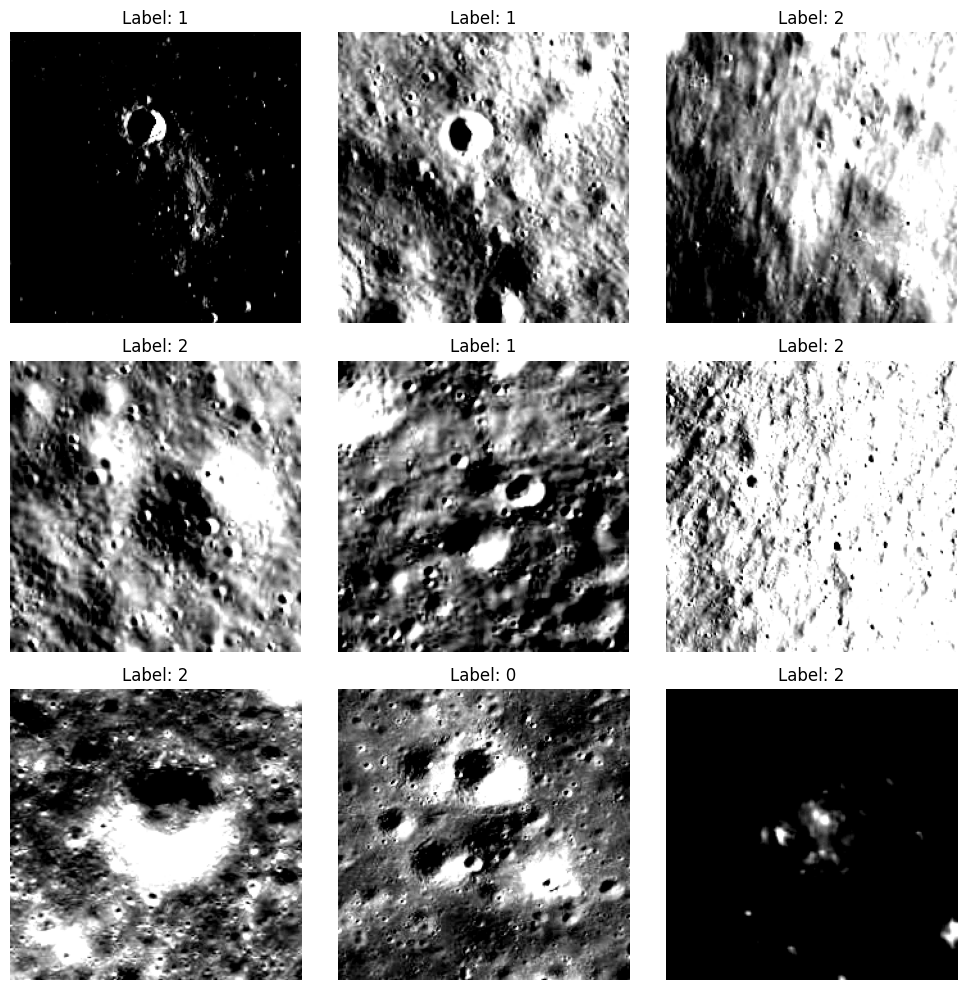

In [ ]:
def scale_for_display(img):
    """Scale normalized image to [0, 1] just for imshow"""
    img_scaled = (img -img.min() / (img.max() - img.min()))
    return img_scaled

#Plot raw normalized images
fig, axes = plt.subplots(3, 3, figsize=(10, 10))
class_names = ["ejecta", "oldcrater", "none"]

for i, ax in enumerate(axes.flat):
    if i < 9:
        #Show normalize image directly
        display_img = scale_for_display(images[i])
        ax.imshow(display_img)
        ax.set_title(f"Label: {labels[i]}")
        ax.axis("off")

plt.tight_layout()
plt.show()